In [63]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore


In [64]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


--2024-03-21 11:51:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   208MB/s    in 0.5s    

2024-03-21 11:51:54 (208 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that

In [65]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys


  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-wm11n2bn
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-wm11n2bn
  Resolved https://github.com/ersilia-os/ersilia.git to commit ede7206c99bdc7315c71874e2704bb76a3110aaa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [66]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")


# Mounting the Drive


In [67]:
## Mount google drive
from google.colab import drive

drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Specifying the Input and Output Folders


In [68]:
# specify your input folder

input_folder = "/content/gdrive/MyDrive/Ersilia"  # @param {type:"string"}


In [69]:
# specify your output folder

output_folder = "/content/gdrive/MyDrive/Ersilia"  # @param {type:"string"}


# Specifying Input the File and Column Name


In [70]:
# specify the name of your input csv file

input_filename = "reference_library"  # @param {type:"string"}


In [71]:
# specify the SMILES column name
smiles_column = "smiles"  # @param {type:"string"}

In [72]:
# @title 🔤 Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 1000 SMILES


In [73]:
!pip install rdkit

In [74]:
#checking if smiles are valid

!pip install rdkit
import rdkit.Chem as Chem

def is_smiles(smiles):
    try:
        Chem.MolFromSmiles(smiles)
        return True
    except:
        return False

for i in smiles:
    if is_smiles(i):
        print("Valid SMILES")
    else:
        print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

In [75]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}


In [76]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")


⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:33743
   PID: 29772
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 198.34 seconds


In [77]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:57463
   PID: 30019
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [78]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()


Successful 👍! Time taken: 64.06 seconds


In [ ]:
# @title ✔️ Check your results

print(output.head())


In [ ]:
# @title 💾 Save your results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)


In [81]:
#Put output into a DataFrame

df = pd.DataFrame(output, columns=['key', 'input', 'solubility'])
df.head()


,key,input,solubility
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,-3.454
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,-4.502
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,-2.900
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,-4.777
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,-4.473


# Plotting Histogram with Output from Predictions


In [82]:
#Import seaborn library for visualization

import seaborn as sns

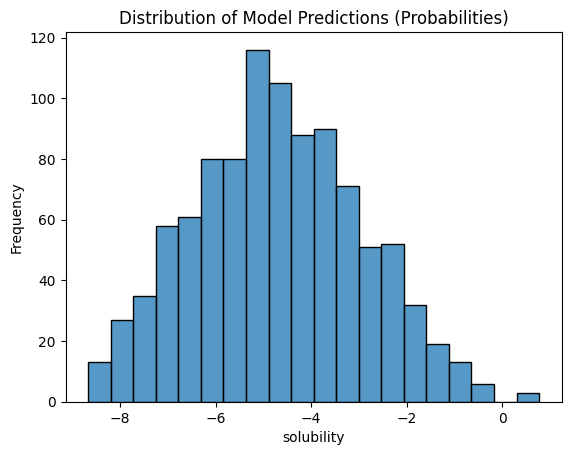

In [83]:
sns.histplot(data=df, x='solubility')
plt.title('Distribution of Model Predictions (Probabilities)')
plt.xlabel('solubility')
plt.ylabel('Frequency')
plt.show()


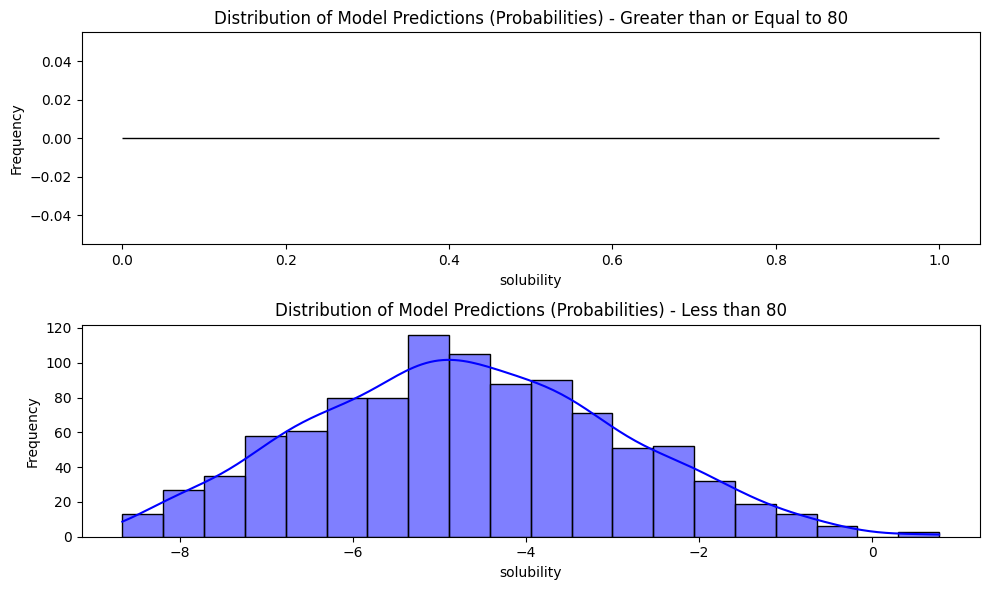

In [84]:
above_or_equal_80 = df[df['solubility'] >= 80]
below_80 = df[df['solubility'] < 80]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(data=above_or_equal_80, x='solubility', kde=True, color='purple')
plt.title('Distribution of Model Predictions (Probabilities) - Greater than or Equal to 80')
plt.xlabel('solubility')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.histplot(data=below_80, x='solubility', kde=True, color='blue')
plt.title('Distribution of Model Predictions (Probabilities) - Less than 80')
plt.xlabel('solubility')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



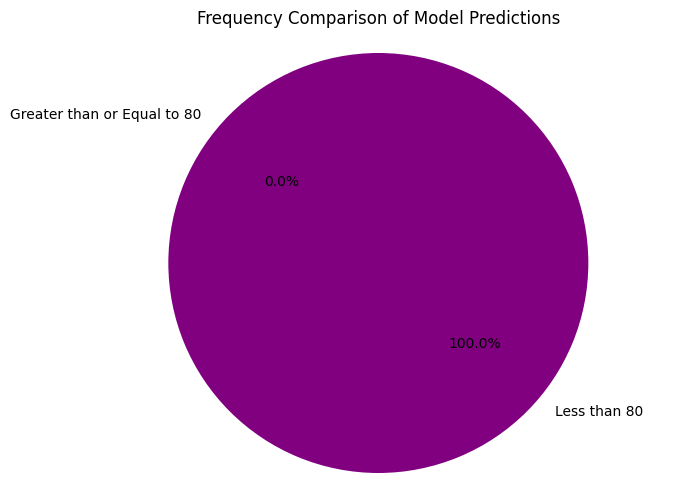

In [85]:
above_or_equal_80_count = len(df[df['solubility'] >= 80])
below_80_count = len(df[df['solubility'] < 80])

labels = ['Greater than or Equal to 80', 'Less than 80']
sizes = [above_or_equal_80_count, below_80_count]
colors = ['red', 'purple']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency Comparison of Model Predictions')
plt.axis('equal')
plt.show()

# Visualizing the compounds that has highest probabilities

<ipython-input-86-a33b8cb1a808>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


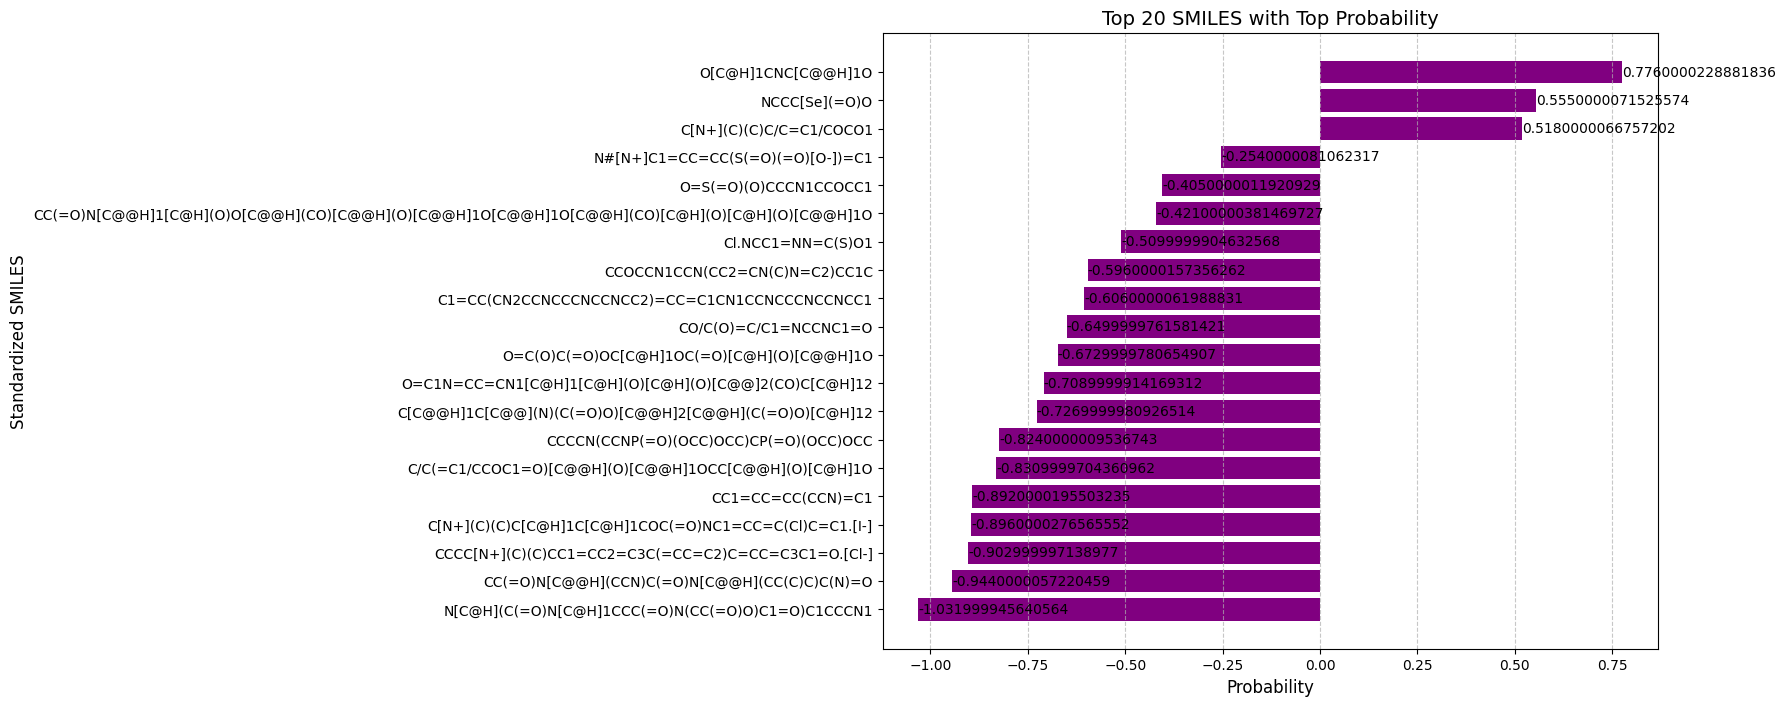

In [86]:
top_20_smiles = df.sort_values(by='solubility', ascending=False).head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_smiles['input'], top_20_smiles['solubility'], color='purple')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Probability', fontsize=12)
plt.ylabel('Standardized SMILES', fontsize=12)
plt.title('Top 20 SMILES with Top Probability', fontsize=14)
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Visualizing the compounds that has highest probabilities

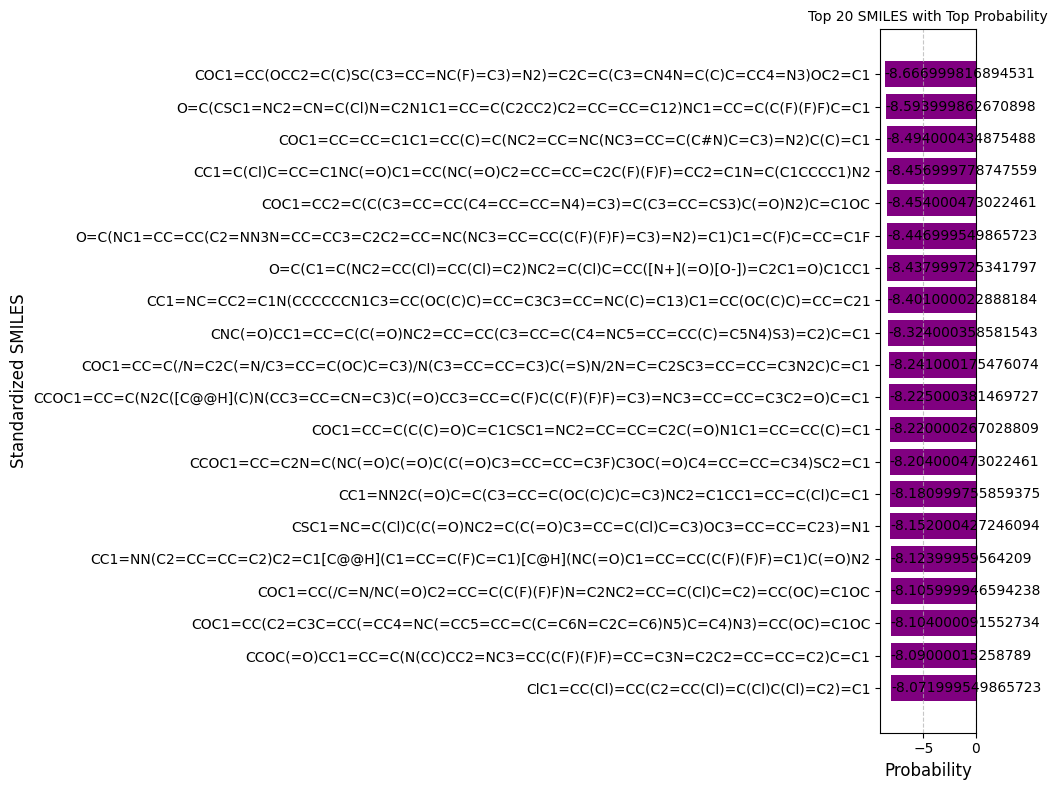

In [87]:
top_20_smiles = df.sort_values(by='solubility', ascending=True).head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_smiles['input'], top_20_smiles['solubility'], color='purple')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Probability', fontsize=12)
plt.ylabel('Standardized SMILES', fontsize=12)
plt.title('Top 20 SMILES with Top Probability', fontsize=10)
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Visualizing the scatter plot of predicted probabilities

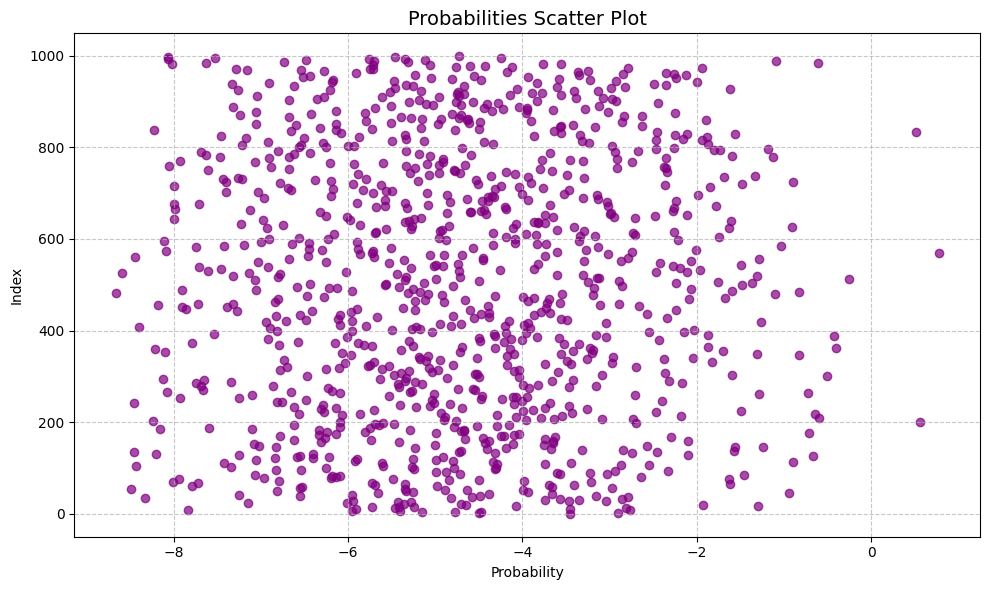

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(df['solubility'], df.index, color='purple', alpha=0.7)
plt.ylabel('Index', fontsize=10)
plt.xlabel('Probability', fontsize=10)
plt.title('Probabilities Scatter Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Visualizing the Probability distribution with ranges

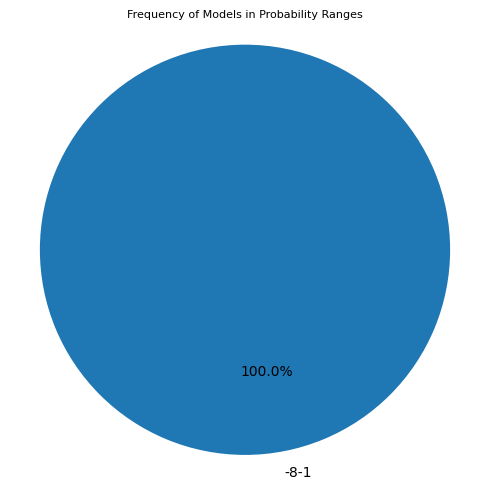

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

df['solubility'] = df['solubility'].astype(int)

bins = range(df['solubility'].min(), df['solubility'].max() + 11, 10)

df['solubility_category'] = pd.cut(df['solubility'], bins=bins, right=False)

# Calculate the frequency of each category
frequency = df['solubility_category'].value_counts().sort_index()

# Plotting the pie chart
labels = [f'{bin.left}-{bin.right-1}' for bin in frequency.index]

plt.figure(figsize=(5, 5))
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=100, colors=plt.cm.tab10.colors)
plt.title('Frequency of Models in Probability Ranges', fontsize=8)
plt.axis('equal')
plt.tight_layout()
plt.show()


#Visualizing the molecules that share the same probabilities

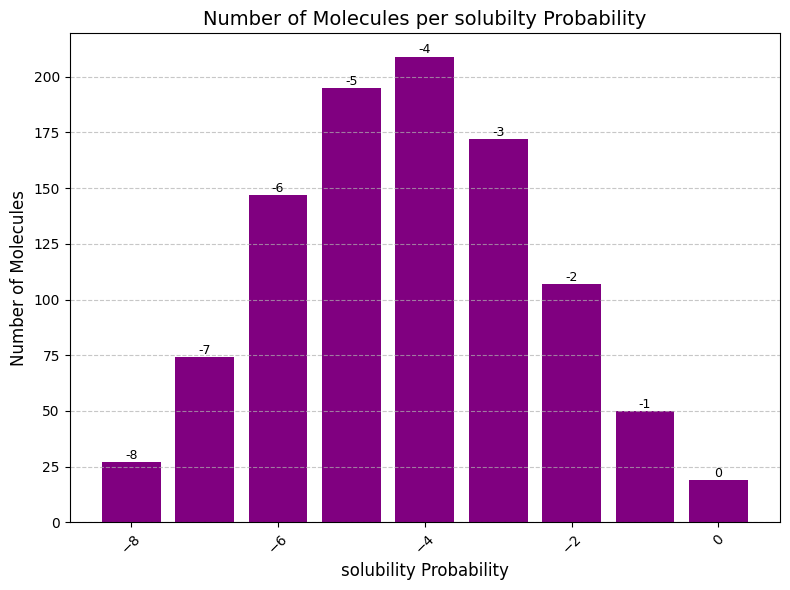

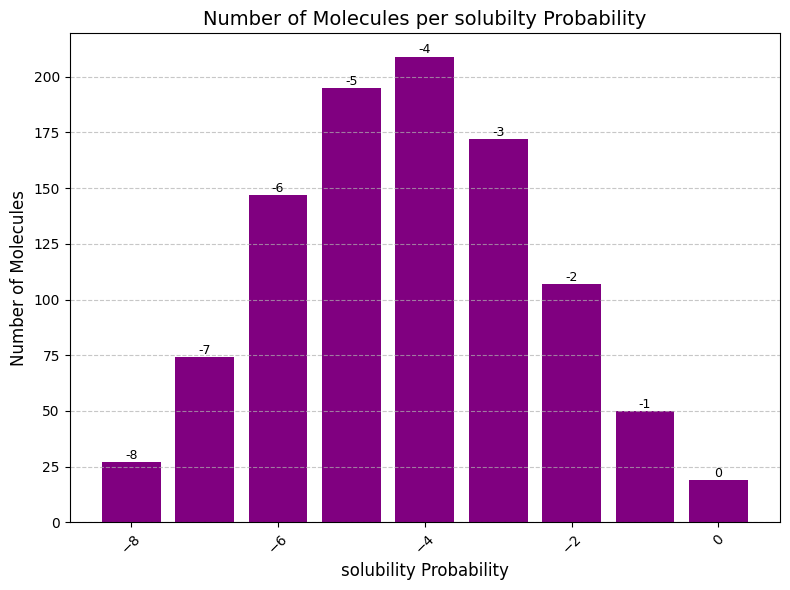

In [90]:
df = df.groupby('solubility').size().reset_index(name='count')


plt.figure(figsize=(8, 6))
bars = plt.bar(df['solubility'], df['count'], color='purple')

for bar, solubility, count in zip(bars, df['solubility'], df['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{solubility}',
             ha='center', va='bottom', fontsize=9)

plt.xlabel('solubility Probability', fontsize=12)
plt.ylabel('Number of Molecules', fontsize=12)
plt.title('Number of Molecules per solubilty Probability', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The predictions reveal negative solubility values, indicating that a significant number of SMILES fall within the solubility range of (-4) to (-6). This observation may be due to low solubility of some molecules represented by these SMILES strings.
